In [5]:
import intake
import os
import zarr

In [17]:
col_url = "https://cmip6downscaling.blob.core.windows.net/cmip6/pangeo-cmip6.json"

col = intake.open_esm_datastore(col_url)

full_subset = col.search(
    activity_id=["CMIP", "ScenarioMIP"],
    experiment_id=["historical"], #, "ssp245", "ssp370", "ssp585"
    member_id="r1i1p1f1",
    source_id="BCC-CSM2-MR",
    table_id="day",
    grid_label="gn",
    variable_id=["tasmax"],#tasmax, tasmin, pr
)

In [2]:
def get_store(bucket, prefix, account_key=None):
    ''' helper function to create a zarr store'''

    if account_key is None:
        account_key = os.environ.get('AccountKey', None)

    store = zarr.storage.ABSStore(
        bucket,
        prefix=prefix,
        account_name="cmip6downscaling",
        account_key=account_key
    )
    return store

In [8]:
full_subset.df['zstore'].item()

'az://cmip6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/pr/gn/v20181126/'

In [3]:
get_store(bucket='cmip6',
          prefix='CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/pr/gn/v20181126/',)

/tmp/ipykernel_1323/677089944.py:7: FutureWarning: Providing 'container', 'account_name', 'account_key', and 'blob_service_kwargs'is deprecated. Provide and instance of 'azure.storage.blob.ContainerClient' 'client' instead.
  store = zarr.storage.ABSStore(


In [18]:
ds = full_subset.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}, 
    storage_options={'account_name':'cmip6downscaling',
                     'account_key':os.environ.get('AccountKey', None)}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


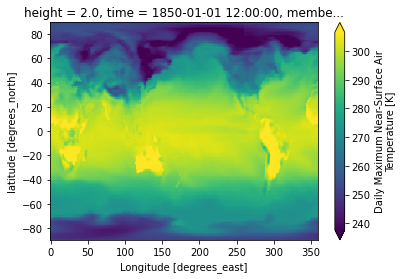

In [20]:
ds['CMIP.BCC.BCC-CSM2-MR.historical.day.gn'].tasmax.isel(time=slice(0,30)).

In [15]:
ds['CMIP.BCC.BCC-CSM2-MR.historical.day.gn']

<xarray.Dataset>
Dimensions:    (lat: 160, bnds: 2, lon: 320, member_id: 1, time: 60225)
Coordinates:
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(160, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(320, 2), meta=np.ndarray>
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(30113, 1), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    pr         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 160, 320), meta=np.ndarray>
Attributes: (12/54)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           Standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   2289.0
    cmor_version:            3.3.2
    ...                      ...
    tracking_id:             hdl:21.14100/f1c3d03a-7f06-401d-ae18-34b4fd66fa3...
    variable_id:             pr
    variant_label:           r1i1p1f1
    version_id:              v20181126
    intake_esm_varname:      ['pr']
    intake_esm_dataset_key:  CMIP.BCC.BCC-CSM2-MR.historical.day.gn

In [ ]:
def downscale(method_specs):
    downscale_model = get_model(method_specs, model_params=method_specs)
    downscale_model.prep() # calls regrid
    downscale_model.fit() # quantile mapping
    downscale_model.predict()
    downscale_model.eval()

In [ ]:
def get_model():
    ensure_consistency(method_specs, obs) # either check that params match obs or that obs can be coerced into matching specs
    return quantile_mapping # this will be a class

In [ ]:
def quantile_mapping(gcm, obs)

In [ ]:
# grab a gcm
# grab training data
downscale(method_specs={'name': 'quantile_mapping',  # when you regrid gets decided by the method 'chiao'
#                         'varibles':
#                         'spatial_resolution': ,
#                         'temporal_resolution':}, 
                        # which choices do we want to expose and test/run multiple permutations of
          gcm=gcm, 
          scenario=scenario, 
          region='global', 
         )
evaluate_performance() 
# gcm changes and metrics AND obs ;
# how well is it actually bias-corrected- what biases remain?
evaluate_changes() # store the change signal? 

thoughts:
* when to take from raw gcm grid to output - depends on method (maybe a downscaling method will keep it on its raw grid and find nearest neighbor or patterns?)
* what about other cmip6 experiments (not just scenario mip)